# Visualizations Via Matplotlib
In this Jupyter notebook, several visualizations highlighting different relationships between top draft pick player statistics and their draft position over a period of 32 seasons (i.e., from 1990-2021) were created. These were done using the data extracted using several APIs that was cleaned and organized, as well as the ```pandas```, ```NumPy```, ```Matplotlib```, and ```scipy``` Python libraries. We note that more visualizations than presented were created to explore which relationships more strongly answered the questions asked (see ```README.md``` file for these questions).

## Table of Contents
Please note that the ```hyperlinks``` below do not function correctly when viewing this Jupyter notebook on ```Github```. Also, only the scatter plots created in items 2, 3, 7, 8, 9, and 10 were used in the final presentation.
1. [General Set-Up](#general-set-up)
2. [Average Points Per Game (AVG PPG) as a Function of Draft Position](#average-points-per-game-as-a-function-of-draft-position)

    2.1. [Linear Regression Analysis: AVG PPG as a Function of Draft Position](#linear-regression-analysis-avg-ppg-as-a-function-of-draft-position)

3. [Average Assists Per Game (AVG APG) as a Function of Draft Position](#average-assists-per-game-as-a-function-of-draft-position)

    3.1. [Linear Regression Analysis: AVG PPG as a Function of Draft Position](#linear-regression-analysis-avg-apg-as-a-function-of-draft-position)

4. [Average Rebounds Per Game (AVG RPG) as a Function of Draft Position](#average-rebounds-per-game-as-a-function-of-draft-position)

    4.1. [Linear Regression Analysis: AVG RPG as a Function of Draft Position](#linear-regression-analysis-avg-rpg-as-a-function-of-draft-position)

5. [Average Minutes Per Game (AVG MPG) as a Function of Draft Position](#average-minutes-per-game-as-a-function-of-draft-position)

    5.1. [Linear Regression Analysis: AVG MPG as a Function of Draft Position](#linear-regression-analysis-avg-mpg-as-a-function-of-draft-position)

6. [Average Games Played (AVG GP) as a Function of Draft Position](#average-games-played-as-a-function-of-draft-position)

    6.1. [Linear Regression Analysis: AVG GP as a Function of Draft Position](#linear-regression-analysis-avg-gp-as-a-function-of-draft-position)

7. [Average Win-Shares (AVG WS) as a Function of Draft Position](#average-ws-as-a-function-of-draft-position)

    7.1. [Linear Regression Analysis: AVG WS as a Function of Draft Position](#linear-regression-analysis-avg-ws-as-a-function-of-draft-position)

8. [Average Box Plus-Minus (AVG BPM) as a Function of Draft Position](#average-bpm-as-a-function-of-draft-position)

    8.1. [Linear Regression Analysis: AVG BPM as a Function of Draft Position](#linear-regression-analysis-avg-bpm-as-a-function-of-draft-position)

9. [Average Steals Per Game (AVG STPG) as a Function of Draft Position](#average-stpg-as-a-function-of-draft-position)

    9.1. [Linear Regression Analysis: AVG STPG as a Function of Draft Position](#linear-regression-analysis-avg-stpg-as-a-function-of-draft-position)

10. [Average Blocks Per Game (AVG BLKPG) as a Function of Draft Position](#average-blkpg-as-a-function-of-draft-position)

    10.1. [Linear Regression Analysis: AVG BLKPG as a Function of Draft Position](#linear-regression-analysis-avg-blkpg-as-a-function-of-draft-position)

### General Set-Up

In [24]:
# Importing the necessary Python libraries/dependecies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

# Loading the CSV file of the relevant NBA player draft data and associated statistics
draft_data = "draft-data-20-years.csv"

# Loading the CSV file of the NBA all-time leaders and their associated statistics
player_data = "player_stats.csv"

# Reading the CSV file of the relevant NBA player draft data and associated statistics
draft_data_df = pd.read_csv(draft_data)

# Reading the CSV file of the NBA all-time leaders and their associated statistics
player_data_df = pd.read_csv(player_data)

# Displaying the first five rows of the draft_data_df DataFrame using the pandas head() function
# draft_data_df.head()

# Displaying the first five rows of the all_star_data_df DataFrame using the pandas head() function
# player_data_df.head()

Unnamed: 0  Rk  Pk   Tm              Player       College   Yrs       G  \
0           1   1   1  BRK     Derrick Coleman      Syracuse  15.0   781.0   
1           2   2   2  OKC         Gary Payton  Oregon State  17.0  1335.0   
2           3   3   3  DEN  Mahmoud Abdul-Rauf           LSU   9.0   586.0   
3           4   4   4  ORL        Dennis Scott  Georgia Tech  10.0   629.0   
4           5   5   5  CHA        Kendall Gill      Illinois  15.0   966.0   

     TOTMP   TOTPTS  ...  WS/48  BPM  VORP  DraftYr   MPG   PPG  RPG  APG  \
0  25903.0  12884.0  ...  0.119  1.4  22.3     1990  33.2  16.5  9.3  2.5   
1  47117.0  21813.0  ...  0.148  3.3  62.5     1990  35.3  16.3  3.9  6.7   
2  15628.0   8553.0  ...  0.077 -0.8   4.5     1990  26.7  14.6  1.9  3.5   
3  17983.0   8094.0  ...  0.089  0.2   9.9     1990  28.6  12.9  2.8  2.1   
4  29481.0  12914.0  ...  0.078  0.1  15.8     1990  30.5  13.4  4.1  3.0   

                                           playerurl  DraftYear  
0  https://www.sports-reference.com/cbb/players/d...       1990  
1  https://www.sports-reference.com/cbb/players/g...       1990  
2  https://www.sports-reference.com/cbb/players/m...       1990  
3  https://www.sports-reference.com/cbb/players/d...       1990  
4  https://www.sports-reference.com/cbb/players/k...       1990  

[5 rows x 26 columns]

### Average Points Per Game (AVG PPG) as a Function of Draft Position (1990-2021)

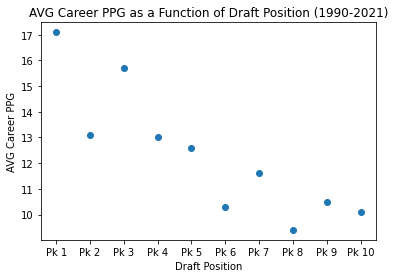

In [46]:
# Creating a matplotlib scatter plot of AVG PPG as a function of draft position
# First, computing the AVG PPG of the first 10 picks of each draft from 1990-2021 by implementing a for loop, as well as using the loc(), mean(), and round() pandas functions
range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10];
PPG_dp = [];
for i in range:
    x = round(draft_data_df.loc[draft_data_df['Pk'] == i, 'PPG'].mean(),1)
    PPG_dp.append(x)
# print(PPG_dp)

# Creating scatter plot of AVG career PPG as a function of draft position using Matplotlib
draft_pos = ['Pk 1', 'Pk 2', 'Pk 3', 'Pk 4', 'Pk 5', 'Pk 6', 'Pk 7', 'Pk 8', 'Pk 9', 'Pk 10'];
plt.scatter(draft_pos, PPG_dp, c='tab:blue', label='data');

# Adding title, x-axis label, and y-axis label to the plot
plt.title("AVG Career PPG as a Function of Draft Position (1990-2021)");
plt.xlabel("Draft Position");
plt.ylabel("AVG Career PPG");

# Displaying the scatter plot
plt.show()

### Linear Regression Analysis: AVG PPG as a Function of Draft Position

In [67]:
# Creating a pandas DataFrame with only the integer values of draft pick position for the subsequent regression analyses
p = [1,2,3,4,5,6,7,8,9,10]
dp =pd.DataFrame(p, columns =['DP'])
dp.head()

DP
0   1
1   2
2   3
3   4
4   5

The correlation between draft position and PPG is -0.87
The p-value is 0.001
The linear regression equation is y=-0.72x+16.31


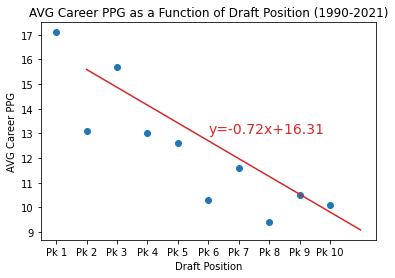

In [87]:
# Calculating the correlation coefficient for draft position and PPG
corr = st.pearsonr(dp['DP'], PPG_dp)
corr_coeff = round(corr[0],2)
print("The correlation between draft position and PPG is" + " " + str(corr_coeff))
p_val = round(corr[1],3)
print("The p-value is" + " " + str(p_val))

# Linear regression model
slope, intercept, r, p, se = st.linregress(dp['DP'], PPG_dp)
r_values = dp['DP']*slope + intercept
lin_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
print("The linear regression equation is " + str(lin_eq))

# Generating the scatter plot and fitting line of best fit via linear regression
plt.scatter(draft_pos, PPG_dp, c='tab:blue', label='data');
plt.plot(dp['DP'], r_values, color='tab:red',label=lin_eq)

# Adding title, x-axis label, y-axis label, and the equation of the line to the plot
plt.title("AVG Career PPG as a Function of Draft Position (1990-2021)");
plt.xlabel("Draft Position");
plt.ylabel("AVG Career PPG");
plt.text(5, 13, lin_eq, size=14, c='tab:red');

# Saving the plot as a PNG
plt.savefig('PPG.png')

### Average Assists Per Game (AVG APG) as a Function of Draft Position (1990-2021)

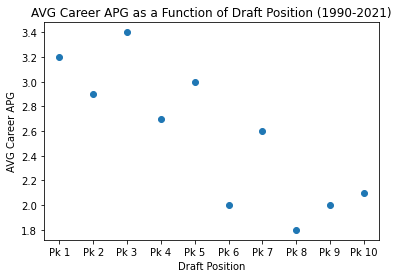

In [106]:
# Creating a matplotlib scatter plot of AVG APG as a function of draft position
# First, computing the AVG APG of the first 10 picks of each draft from 1990-2021 by implementing a for loop, as well as using the loc(), mean(), and round() pandas functions
range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10];
APG_dp = [];
for i in range:
    x = round(draft_data_df.loc[draft_data_df['Pk'] == i, 'APG'].mean(),1)
    APG_dp.append(x)
# print(APG_dp)

# Creating scatter plot of AVG Career APG as a function of draft position using Matplotlib
draft_pos = ['Pk 1', 'Pk 2', 'Pk 3', 'Pk 4', 'Pk 5', 'Pk 6', 'Pk 7', 'Pk 8', 'Pk 9', 'Pk 10'];
plt.scatter(draft_pos, APG_dp, c='tab:blue', label='data');

# Adding title, x-axis label, and y-axis label to the plot
plt.title("AVG Career APG as a Function of Draft Position (1990-2021)");
plt.xlabel("Draft Position");
plt.ylabel("AVG Career APG");

# Displaying the plot
plt.show()

### Linear Regression Analysis: AVG APG as a Function of Draft Position

The correlation between draft position and APG is -0.83
The p-value is 0.003
The linear regression equation is y=-0.15x+3.42


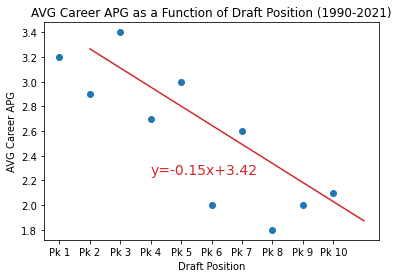

In [124]:
# Calculating the correlation coefficient for draft position and PPG
corr = st.pearsonr(dp['DP'], APG_dp)
corr_coeff = round(corr[0],2)
print("The correlation between draft position and APG is" + " " + str(corr_coeff))
p_val = round(corr[1],3)
print("The p-value is" + " " + str(p_val))

# Linear regression model
slope, intercept, r, p, se = st.linregress(dp['DP'], APG_dp)
r_values = dp['DP']*slope + intercept
lin_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
print("The linear regression equation is " + str(lin_eq))

# Generating the scatter plot and fitting line of best fit via linear regression
plt.scatter(draft_pos, APG_dp, c='tab:blue', label='data');
plt.plot(dp['DP'], r_values, color='tab:red',label=lin_eq)

# Adding title, x-axis label, y-axis label, and the equation of the line to the plot
plt.title("AVG Career APG as a Function of Draft Position (1990-2021)");
plt.xlabel("Draft Position");
plt.ylabel("AVG Career APG");
plt.text(3, 2.25, lin_eq, size=14, c='tab:red');

# Saving the plot as a PNG
plt.savefig('APG.png')

### Average Rebounds Per Game (AVG RPG) as a Function of Draft Position (1990-2021)

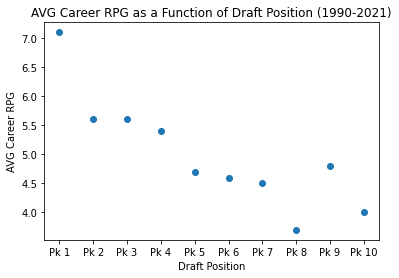

In [141]:
# Creating a matplotlib scatter plot of AVG RPG as a function of draft position
# First, computing the AVG APG of the first 10 picks of each draft from 1990-2021 by implementing a for loop, as well as using the loc(), mean(), and round() pandas functions
range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10];
RPG_dp = [];
for i in range:
    x = round(draft_data_df.loc[draft_data_df['Pk'] == i, 'RPG'].mean(),1)
    RPG_dp.append(x)
# print(RPG_dp)

# Creating scatter plot of AVG Career RPG as a function of draft position using Matplotlib
draft_pos = ['Pk 1', 'Pk 2', 'Pk 3', 'Pk 4', 'Pk 5', 'Pk 6', 'Pk 7', 'Pk 8', 'Pk 9', 'Pk 10'];
plt.scatter(draft_pos, RPG_dp, c='tab:blue', label='data');

# Adding title, x-axis label, and y-axis label to the plot
plt.title("AVG Career RPG as a Function of Draft Position (1990-2021)");
plt.xlabel("Draft Position");
plt.ylabel("AVG Career RPG");

# Displaying the plot
plt.show()

### Linear Regression Analysis: AVG RPG as a Function of Draft Position

The correlation between draft position and RPG is -0.86
The p-value is 0.001
The linear regression equation is y=-0.28x+6.53


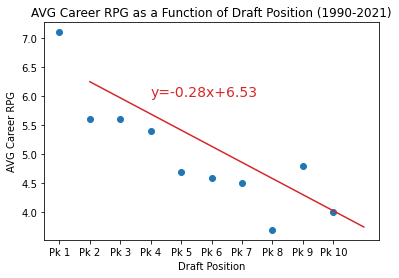

In [157]:
# Calculating the correlation coefficient for draft position and RPG
corr = st.pearsonr(dp['DP'], RPG_dp)
corr_coeff = round(corr[0],2)
print("The correlation between draft position and RPG is" + " " + str(corr_coeff))
p_val = round(corr[1],3)
print("The p-value is" + " " + str(p_val))

# Linear regression model
slope, intercept, r, p, se = st.linregress(dp['DP'], RPG_dp)
r_values = dp['DP']*slope + intercept
lin_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
print("The linear regression equation is " + str(lin_eq))

# Generating the scatter plot and fitting line of best fit via linear regression
plt.scatter(draft_pos, RPG_dp, c='tab:blue', label='data');
plt.plot(dp['DP'], r_values, color='tab:red',label=lin_eq)

# Adding title, x-axis label, y-axis label, and the equation of the line to the plot
plt.title("AVG Career RPG as a Function of Draft Position (1990-2021)");
plt.xlabel("Draft Position");
plt.ylabel("AVG Career RPG");
plt.text(3, 6, lin_eq, size=14, c='tab:red');

### Average Minutes Played Per Game (AVG MPG) as a Function of Draft Position (1990-2021)

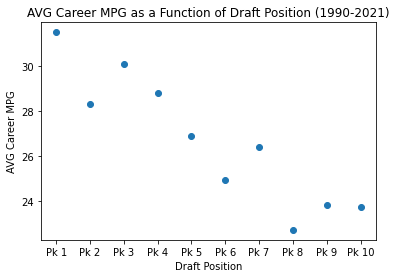

In [172]:
# Creating a matplotlib scatter plot of AVG MPG as a function of draft position
# First, computing the AVG MPG of the first 10 picks of each draft from 1990-2021 by implementing a for loop, as well as using the loc(), mean(), and round() pandas functions
range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10];
MPG_dp = [];
for i in range:
    x = round(draft_data_df.loc[draft_data_df['Pk'] == i, 'MPG'].mean(),1)
    MPG_dp.append(x)
# print(MPG_dp)

# Creating scatter plot of AVG Career MPG as a function of draft position using Matplotlib
draft_pos = ['Pk 1', 'Pk 2', 'Pk 3', 'Pk 4', 'Pk 5', 'Pk 6', 'Pk 7', 'Pk 8', 'Pk 9', 'Pk 10'];
plt.scatter(draft_pos, MPG_dp, c='tab:blue', label='data');

# Adding title, x-axis label, and y-axis label to the plot
plt.title("AVG Career MPG as a Function of Draft Position (1990-2021)");
plt.xlabel("Draft Position");
plt.ylabel("AVG Career MPG");

# Displaying the plot
plt.show()

### Linear Regression Analysis: AVG MPG as a Function of Draft Position

The correlation between draft position and MPG is -0.92
The p-value is 0.0
The linear regression equation is y=-0.9x+31.64


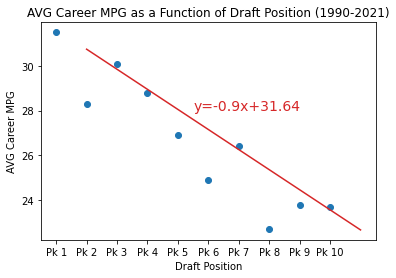

In [186]:
# Calculating the correlation coefficient for draft position and MPG
corr = st.pearsonr(dp['DP'], MPG_dp)
corr_coeff = round(corr[0],2)
print("The correlation between draft position and MPG is" + " " + str(corr_coeff))
p_val = round(corr[1],3)
print("The p-value is" + " " + str(p_val))

# Linear regression model
slope, intercept, r, p, se = st.linregress(dp['DP'], MPG_dp)
r_values = dp['DP']*slope + intercept
lin_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
print("The linear regression equation is " + str(lin_eq))

# Generating the scatter plot and fitting line of best fit via linear regression
plt.scatter(draft_pos, MPG_dp, c='tab:blue', label='data');
plt.plot(dp['DP'], r_values, color='tab:red',label=lin_eq)

# Adding title, x-axis label, y-axis label, and the equation of the line to the plot
plt.title("AVG Career MPG as a Function of Draft Position (1990-2021)");
plt.xlabel("Draft Position");
plt.ylabel("AVG Career MPG");
plt.text(4.5, 28, lin_eq, size=14, c='tab:red');

### Average Games Played (AVG GP) in the League as a Function of Draft Position (1990-2021)

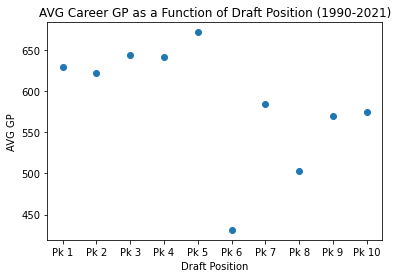

In [199]:
# Creating a matplotlib scatter plot of AVG GP as a function of draft position
# First, computing the AVG MPG of the first 10 picks of each draft from 1990-2021 by implementing a for loop, as well as using the loc(), mean(), and round() pandas functions
range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10];
GP_dp = [];
for i in range:
    x = round(draft_data_df.loc[draft_data_df['Pk'] == i, 'G'].mean(),1)
    GP_dp.append(x)
# print(MPG_dp)

# Creating scatter plot of AVG Career GP as a function of draft position using Matplotlib
draft_pos = ['Pk 1', 'Pk 2', 'Pk 3', 'Pk 4', 'Pk 5', 'Pk 6', 'Pk 7', 'Pk 8', 'Pk 9', 'Pk 10'];
plt.scatter(draft_pos, GP_dp, c='tab:blue', label='data');

# Adding title, x-axis label, and y-axis label to the plot
plt.title("AVG Career GP as a Function of Draft Position (1990-2021)");
plt.xlabel("Draft Position");
plt.ylabel("AVG GP");

# Displaying the plot
plt.show()

### Linear Regression Analysis: AVG GP as a Function of Draft Position

The correlation between draft position and GP is -0.5
The p-value is 0.146
The linear regression equation is y=-11.94x+652.83


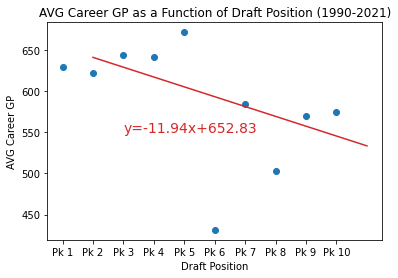

In [211]:
# Calculating the correlation coefficient for draft position and GP
corr = st.pearsonr(dp['DP'], GP_dp)
corr_coeff = round(corr[0],2)
print("The correlation between draft position and GP is" + " " + str(corr_coeff))
p_val = round(corr[1],3)
print("The p-value is" + " " + str(p_val))

# Linear regression model
slope, intercept, r, p, se = st.linregress(dp['DP'], GP_dp)
r_values = dp['DP']*slope + intercept
lin_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
print("The linear regression equation is " + str(lin_eq))

# Generating the scatter plot and fitting line of best fit via linear regression
plt.scatter(draft_pos, GP_dp, c='tab:blue', label='data');
plt.plot(dp['DP'], r_values, color='tab:red',label=lin_eq)

# Adding title, x-axis label, y-axis label, and the equation of the line to the plot
plt.title("AVG Career GP as a Function of Draft Position (1990-2021)");
plt.xlabel("Draft Position");
plt.ylabel("AVG Career GP");
plt.text(2, 550, lin_eq, size=14, c='tab:red');

### Average Win-Shares (AVG WS) as a Function of Draft Position (1990-2021)

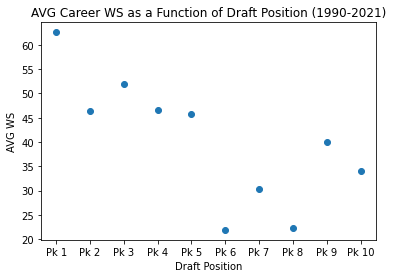

In [222]:
# Creating a matplotlib scatter plot of AVG WS as a function of draft position
# First, computing the AVG WS of the first 10 picks of each draft from 1990-2021 by implementing a for loop, as well as using the loc(), mean(), and round() pandas functions
range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10];
WS_dp = [];
for i in range:
    x = round(draft_data_df.loc[draft_data_df['Pk'] == i, 'WS'].mean(),1)
    WS_dp.append(x)
# print(WS_dp)

# Creating scatter plot of AVG Career WS as a function of draft position using Matplotlib
draft_pos = ['Pk 1', 'Pk 2', 'Pk 3', 'Pk 4', 'Pk 5', 'Pk 6', 'Pk 7', 'Pk 8', 'Pk 9', 'Pk 10'];
plt.scatter(draft_pos, WS_dp, c='tab:blue', label='data');

# Adding title, x-axis label, and y-axis label to the plot
plt.title("AVG Career WS as a Function of Draft Position (1990-2021)");
plt.xlabel("Draft Position");
plt.ylabel("AVG WS");

# Displaying the plot
plt.show()

### Linear Regression Analysis: AVG WS as a Function of Draft Position

The correlation between draft position and AVG WS is -0.73
The p-value is 0.016
The linear regression equation is y=-3.16x+57.55


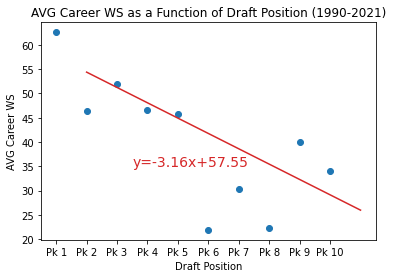

In [232]:
# Calculating the correlation coefficient for draft position and AVG WS
corr = st.pearsonr(dp['DP'], WS_dp)
corr_coeff = round(corr[0],2)
print("The correlation between draft position and AVG WS is" + " " + str(corr_coeff))
p_val = round(corr[1],3)
print("The p-value is" + " " + str(p_val))

# Linear regression model
slope, intercept, r, p, se = st.linregress(dp['DP'], WS_dp)
r_values = dp['DP']*slope + intercept
lin_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
print("The linear regression equation is " + str(lin_eq))

# Generating the scatter plot and fitting line of best fit via linear regression
plt.scatter(draft_pos, WS_dp, c='tab:blue', label='data');
plt.plot(dp['DP'], r_values, color='tab:red',label=lin_eq)

# Adding title, x-axis label, y-axis label, and the equation of the line to the plot
plt.title("AVG Career WS as a Function of Draft Position (1990-2021)");
plt.xlabel("Draft Position");
plt.ylabel("AVG Career WS");
plt.text(2.5, 35, lin_eq, size=14, c='tab:red');

# Saving the plot as a PNG
plt.savefig('WS.png')

### Average Box Plus-Minus Rating (AVG BPM) as a Function of Draft Position (1990-2021)

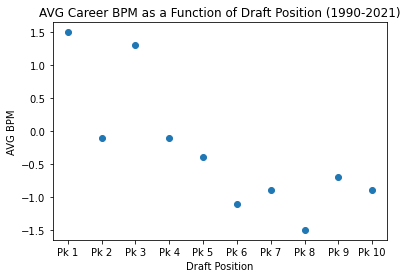

In [241]:
# Creating a matplotlib scatter plot of AVG BPM as a function of draft position
# First, computing the AVG BPM of the first 10 picks of each draft from 1990-2021 by implementing a for loop, as well as using the loc(), mean(), and round() pandas functions
range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10];
BPM_dp = [];
for i in range:
    x = round(draft_data_df.loc[draft_data_df['Pk'] == i, 'BPM'].mean(),1)
    BPM_dp.append(x)
# print(BPM_dp)

# Creating scatter plot of AVG Career BPM as a function of draft position using Matplotlib
draft_pos = ['Pk 1', 'Pk 2', 'Pk 3', 'Pk 4', 'Pk 5', 'Pk 6', 'Pk 7', 'Pk 8', 'Pk 9', 'Pk 10'];
plt.scatter(draft_pos, BPM_dp, c='tab:blue', label='data');

# Adding title, x-axis label, and y-axis label to the plot
plt.title("AVG Career BPM as a Function of Draft Position (1990-2021)");
plt.xlabel("Draft Position");
plt.ylabel("AVG BPM");

# Displaying the plot
plt.show()

### Linear Regression Analysis: AVG BPM as a Function of Draft Position

The correlation between draft position and AVG BPM is -0.79
The p-value is 0.006
The linear regression equation is y=-0.26x+1.14


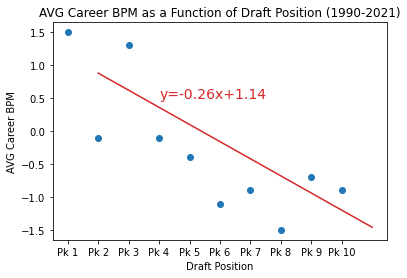

In [249]:
# Calculating the correlation coefficient for draft position and AVG BPM
corr = st.pearsonr(dp['DP'], BPM_dp)
corr_coeff = round(corr[0],2)
print("The correlation between draft position and AVG BPM is" + " " + str(corr_coeff))
p_val = round(corr[1],3)
print("The p-value is" + " " + str(p_val))

# Linear regression model
slope, intercept, r, p, se = st.linregress(dp['DP'], BPM_dp)
r_values = dp['DP']*slope + intercept
lin_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
print("The linear regression equation is " + str(lin_eq))

# Generating the scatter plot and fitting line of best fit via linear regression
plt.scatter(draft_pos, BPM_dp, c='tab:blue', label='data');
plt.plot(dp['DP'], r_values, color='tab:red',label=lin_eq)

# Adding title, x-axis label, y-axis label, and the equation of the line to the plot
plt.title("AVG Career BPM as a Function of Draft Position (1990-2021)");
plt.xlabel("Draft Position");
plt.ylabel("AVG Career BPM");
plt.text(3, 0.5, lin_eq, size=14, c='tab:red');

# Saving the plot as a PNG
plt.savefig('BPM.png')

### Average Steals Per Game (AVG STPG) as a Function of Draft Position (1990-2021)

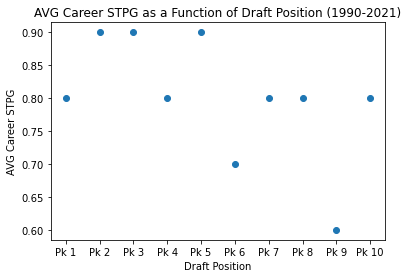

In [256]:
# Obtaining the unique player ID's in the player_data_df DataFrame using the sort_values() and unique() functions
ids = player_data_df["Player ID.1"]
player_data_df[ids.isin(ids[ids.duplicated()])].sort_values("Player ID.1")
unique_player_id = player_data_df["Player ID.1"].unique()
unique_player_id

# Computing the mean steals per game for each unique player ID in the player_data_df DataFrame using the mean() pandas function
STPG_dp = [];
for i in unique_player_id:
    x = round(player_data_df.loc[player_data_df['Player ID.1'] == i, 'Average Steals per Game'].mean(),1)
    STPG_dp.append(x)
#print(STPG_dp)

# Creating a new pandas DataFrame that drops the duplicated values of player ID (this is done to help determine the pick order of each unique player)
new = player_data_df.drop_duplicates(subset=['Player ID.1'])
# Importing the above DataFrame to a CSV file
new.to_csv('new.csv')

# Loading the CSV file containing organized player data 
organized_player_data = "organized_player_data.csv"

# Reading the CSV file containing the organzied player data
organized_player_data_df = pd.read_csv(organized_player_data)

# Appending a new column on the organized_player_data_df DataFrame containing the average steals per game per player values computed above
organized_player_data_df['AVG STPG'] = STPG_dp

# Displaying the first five rows of the organized_player_data_df DataFrame using the pandas head() function
organized_player_data_df.head()

# Creating a matplotlib scatter plot of AVG STPG as a function of draft position
# First, computing the AVG STPG of the first 10 picks of each draft from 1990-2021 by implementing a for loop, as well as using the loc(), mean(), and round() pandas functions
range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10];
STL_dp = [];
for i in range:
    x = round(organized_player_data_df.loc[organized_player_data_df['PK'] == i, 'AVG STPG'].mean(),1)
    STL_dp.append(x)
# print(STL_dp)

# Creating scatter plot of AVG career STPG as a function of draft position using Matplotlib
draft_pos = ['Pk 1', 'Pk 2', 'Pk 3', 'Pk 4', 'Pk 5', 'Pk 6', 'Pk 7', 'Pk 8', 'Pk 9', 'Pk 10'];
plt.scatter(draft_pos, STL_dp, c='tab:blue', label='data');

# Adding title, x-axis label, and y-axis label to the plot
plt.title("AVG Career STPG as a Function of Draft Position (1990-2021)");
plt.xlabel("Draft Position");
plt.ylabel("AVG Career STPG");

# Displaying the plot
plt.show()
    

### Linear Regression Analysis: AVG STPG as a Function of Draft Position

The correlation between draft position and STPG is -0.54
The p-value is 0.103
The linear regression equation is y=-0.02x+0.89


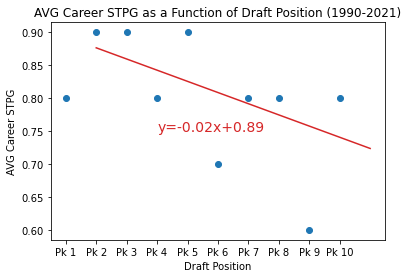

In [262]:
# Calculating the correlation coefficient for draft position and STPG
corr = st.pearsonr(dp['DP'], STL_dp)
corr_coeff = round(corr[0],2)
print("The correlation between draft position and STPG is" + " " + str(corr_coeff))
p_val = round(corr[1],3)
print("The p-value is" + " " + str(p_val))

# Linear regression model
slope, intercept, r, p, se = st.linregress(dp['DP'], STL_dp)
r_values = dp['DP']*slope + intercept
lin_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
print("The linear regression equation is " + str(lin_eq))

# Generating the scatter plot and fitting line of best fit via linear regression
plt.scatter(draft_pos, STL_dp, c='tab:blue', label='data');
plt.plot(dp['DP'], r_values, color='tab:red',label=lin_eq)

# Adding title, x-axis label, y-axis label, and the equation of the line to the plot
plt.title("AVG Career STPG as a Function of Draft Position (1990-2021)");
plt.xlabel("Draft Position");
plt.ylabel("AVG Career STPG");
plt.text(3, 0.75, lin_eq, size=14, c='tab:red');

# Saving the plot as a PNG
plt.savefig('STPG.png')

### Average Blocks Per Game (AVG BLKPG) as a Function of Draft Position (1990-2021)

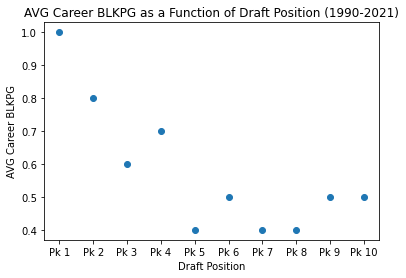

In [267]:
# Computing the mean blocks per game for each unique player ID in the player_data_df DataFrame using the mean() pandas function
BLKPG_dp = [];
for i in unique_player_id:
    x = round(player_data_df.loc[player_data_df['Player ID.1'] == i, 'Average Blocks'].mean(),1)
    BLKPG_dp.append(x)
#print(BLKPG_dp)

# Appending a new column on the organized_player_data_df DataFrame containing the average steals per game per player values computed above
organized_player_data_df['AVG BLKPG'] = BLKPG_dp

# Displaying the first five rows of the organized_player_data_df DataFrame using the pandas head() function
organized_player_data_df.head()

# Creating a matplotlib scatter plot of AVG BLKPG as a function of draft position
# First, computing the AVG BLKPG of the first 10 picks of each draft from 1990-2021 by implementing a for loop, as well as using the loc(), mean(), and round() pandas functions
range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10];
BLK_dp = [];
for i in range:
    x = round(organized_player_data_df.loc[organized_player_data_df['PK'] == i, 'AVG BLKPG'].mean(),1)
    BLK_dp.append(x)
# print(STL_dp)

# Creating scatter plot of AVG career BLKPG as a function of draft position using Matplotlib
draft_pos = ['Pk 1', 'Pk 2', 'Pk 3', 'Pk 4', 'Pk 5', 'Pk 6', 'Pk 7', 'Pk 8', 'Pk 9', 'Pk 10'];
plt.scatter(draft_pos, BLK_dp, c='tab:blue', label='data');

# Adding title, x-axis label, and y-axis label to the plot
plt.title("AVG Career BLKPG as a Function of Draft Position (1990-2021)");
plt.xlabel("Draft Position");
plt.ylabel("AVG Career BLKPG");

# Displaying the plot
plt.show()

### Linear Regression Analysis: AVG BLKPG as a Function of Draft Position

The correlation between draft position and BLKPG is -0.77
The p-value is 0.008
The linear regression equation is y=-0.05x+0.86


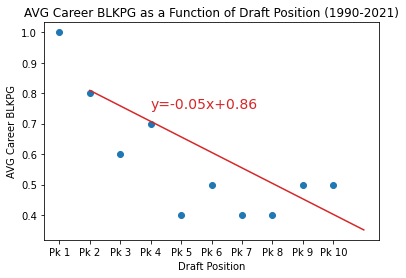

In [271]:
# Calculating the correlation coefficient for draft position and BLKPG
corr = st.pearsonr(dp['DP'], BLK_dp)
corr_coeff = round(corr[0],2)
print("The correlation between draft position and BLKPG is" + " " + str(corr_coeff))
p_val = round(corr[1],3)
print("The p-value is" + " " + str(p_val))

# Linear regression model
slope, intercept, r, p, se = st.linregress(dp['DP'], BLK_dp)
r_values = dp['DP']*slope + intercept
lin_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
print("The linear regression equation is " + str(lin_eq))

# Generating the scatter plot and fitting line of best fit via linear regression
plt.scatter(draft_pos, BLK_dp, c='tab:blue', label='data');
plt.plot(dp['DP'], r_values, color='tab:red',label=lin_eq)

# Adding title, x-axis label, y-axis label, and the equation of the line to the plot
plt.title("AVG Career BLKPG as a Function of Draft Position (1990-2021)");
plt.xlabel("Draft Position");
plt.ylabel("AVG Career BLKPG");
plt.text(3, 0.75, lin_eq, size=14, c='tab:red');

# Saving the plot as a PNG
plt.savefig('BLKPG.png')

### Average Defensive Rebounds Per Game (AVG DRPG) as a Function of Draft Position (1990-2021)

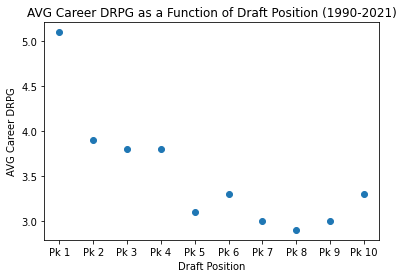

In [274]:
# Computing the mean defensive rebounds per game for each unique player ID in the player_data_df DataFrame using the mean() pandas function
DRPG_dp = [];
for i in unique_player_id:
    x = round(player_data_df.loc[player_data_df['Player ID.1'] == i, 'Average Defensive Rebounds'].mean(),1)
    DRPG_dp.append(x)
#print(BLKPG_dp)

# Appending a new column on the organized_player_data_df DataFrame containing the average steals per game per player values computed above
organized_player_data_df['AVG DRPG'] = DRPG_dp

# Displaying the first five rows of the organized_player_data_df DataFrame using the pandas head() function
organized_player_data_df.head()

# Creating a matplotlib scatter plot of AVG DRPG as a function of draft position
# First, computing the AVG DRPG of the first 10 picks of each draft from 1990-2021 by implementing a for loop, as well as using the loc(), mean(), and round() pandas functions
range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10];
DR_dp = [];
for i in range:
    x = round(organized_player_data_df.loc[organized_player_data_df['PK'] == i, 'AVG DRPG'].mean(),1)
    DR_dp.append(x)
# print(DR_dp)

# Creating scatter plot of AVG career DRPG as a function of draft position using Matplotlib
draft_pos = ['Pk 1', 'Pk 2', 'Pk 3', 'Pk 4', 'Pk 5', 'Pk 6', 'Pk 7', 'Pk 8', 'Pk 9', 'Pk 10'];
plt.scatter(draft_pos, DR_dp, c='tab:blue', label='data');

# Adding title, x-axis label, and y-axis label to the plot
plt.title("AVG Career DRPG as a Function of Draft Position (1990-2021)");
plt.xlabel("Draft Position");
plt.ylabel("AVG Career DRPG");

# Displaying the plot
plt.show()

### Linear Regression Analysis: AVG DRPG as a Function of Draft Position

The correlation between draft position and DRPG is -0.8
The p-value is 0.005
The linear regression equation is y=-0.18x+4.49


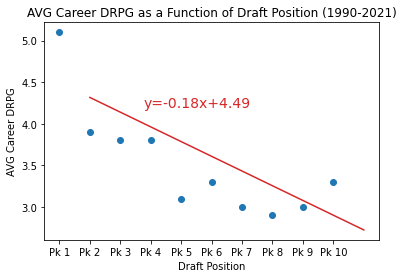

In [276]:
# Calculating the correlation coefficient for draft position and DRPG
corr = st.pearsonr(dp['DP'], DR_dp)
corr_coeff = round(corr[0],2)
print("The correlation between draft position and DRPG is" + " " + str(corr_coeff))
p_val = round(corr[1],3)
print("The p-value is" + " " + str(p_val))

# Linear regression model
slope, intercept, r, p, se = st.linregress(dp['DP'], DR_dp)
r_values = dp['DP']*slope + intercept
lin_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
print("The linear regression equation is " + str(lin_eq))

# Generating the scatter plot and fitting line of best fit via linear regression
plt.scatter(draft_pos, DR_dp, c='tab:blue', label='data');
plt.plot(dp['DP'], r_values, color='tab:red',label=lin_eq)

# Adding title, x-axis label, y-axis label, and the equation of the line to the plot
plt.title("AVG Career DRPG as a Function of Draft Position (1990-2021)");
plt.xlabel("Draft Position");
plt.ylabel("AVG Career DRPG");
plt.text(2.75, 4.2, lin_eq, size=14, c='tab:red');